In [12]:
#Imports
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas as pd

# Evito la notacion científica, mostrando 10 dígitos después de la coma
np.set_printoptions(precision=10,suppress=True)

# Ejercicio 1
Implementar una función para la generación de L sets de datos D = ${(x_i
, t_i)}_{i=1,...,N}$ . Los $x_i$ serán aleatorios y estarán distribuidos uniformemente dentro cierto intervalo [a, b]. Para cada $x_i$ se generará independientemente un valor $t_i$ = sin(2πx) + r correspondiente, donde r será ruido Gaussiano N (0, σ2). 

Por ejemplo L = 200, N = 10, σ = 0.3 y [a, b] = [0, 1].


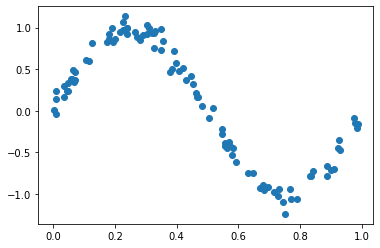

In [2]:
def f(x):
  return math.sin(2*np.pi*x)

def generadorDeDatos(L,N,sigma):
  setDeSetsDeDatos = []
  for i in range(L):
    setDeDatos = []
    setX = []
    setT = []
    for j in range(N):
      x = np.random.uniform(low=0.0, high=1.0)
      setX.append(x)

      ruido = np.random.normal(0, sigma**2)
      t = f(x) + ruido
      setT.append(t)

    setDeDatos.append(setX)
    setDeDatos.append(setT)
    setDeSetsDeDatos.append(setDeDatos)

  return setDeSetsDeDatos

ds = generadorDeDatos(10,100,0.3)
plt.scatter(ds[0][0],ds[0][1])

# Ejercicio 2
Implementar una función que devuelva el vector de pesos óptimo w∗ para un set de datos D, un grado de polinomio M y error cuadrático sin término de regularización $E_D$(w) y con término de regularización $E$(w).
Además, estimar el valor medio del error y su desviación standard en ambos casos utilizando los L sets de datos generados en el 1er punto, utilizando valores de y de M a seleccionar.

In [3]:
# Creo una función que crea la matriz de diseño (solo para el caso de función básica φj(x) = x**j)
# Aclaración: M, en este caso es el número de w´s y no el grado del polinomio. Si llamo G al grado, entonces G = M - 1 
def matrizDeDiseño (dx, M):
  matriz = []
  for x in dx:
    vector = []
    for j in range(M):
      elevado = x ** j
      vector.append(elevado)
    matriz.append(np.array(vector))
  return np.array(matriz)

# Creo una funcion para conseguir los w (Si lam (lambda) es 0, entonces es equivalente a calcularlos sin término de regularización)
def wOptimos (matrizDiseño, dt, lam):
  m = len(matrizDiseño[0]) # Notar que tomo de la matriz, que es de mxn, el m (Porque luego la matriz se transpone y se multiplica, lo que da una de mxm)
  I = np.array(np.identity(m))
  w = np.dot(np.dot((np.linalg.inv((lam*I)+ np.dot(matrizDiseño.transpose(), matrizDiseño))), matrizDiseño.transpose()), dt.transpose())
  return np.array(w)

# Defino la función y(x,w) que es el polinomio evaluado en x, con los w como hiperparámetros
def y(x, W):
  resultado = 0
  i = 0
  for w in W:
    resultado = resultado + w * (x**i)
    i = i + 1
  return resultado

# Defino la función del error E(w) (Con lam (lambda) igual a 0 es el error sin regularizacion)

def E(d_x, d_t, w, lam):
  resultadoAux = 0
  i = 0
  for x in d_x:
    resultadoAux = resultadoAux + pow(y(d_x[i],w) - (d_t[i]), 2)
    i = i + 1
  resultado = (resultadoAux / 2) + (lam/2) * pow(np.linalg.norm(w), 2)
  return resultado

## Pruebas

In [17]:
np.random.seed(1001)

# Primero creo el set de datos con el que voy a trabajar. Hago 200 data sets de 20 datos.
ds_general = generadorDeDatos(200,20,0.3)

#Creo el dataset D, con 20 datos. Lo parto en dos: las x y las t (Las t las transformo en array solo para poder usar funciones de matirices más tarde).
D_x = ds_general[0][0]
D_t = np.array(ds_general[0][1])

#Creo el dataset D_test, con 20 datos. Los uso para testear.
D_x_test = ds_general[1][0]
D_t_test = np.array(ds_general[1][1])

Error de entrenamiento
0.07444380565276758

Error de test
0.10128532983663358


(-1.5, 1.5)

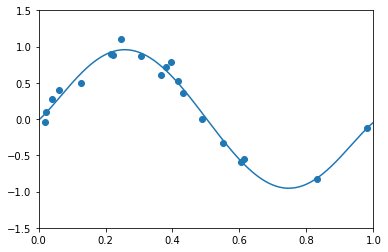

In [22]:
# Prueba 1 (Grado de polinomio medio, no utilizo término de penalización)

md = matrizDeDiseño(D_x, 6)
w = wOptimos(md, D_t, 0)

print("Error de entrenamiento")
print(E(D_x, D_t, w, 0))
print("")
print("Error de test")
print(E(D_x_test, D_t_test, w, 0))
#print(md)

plt.scatter(D_x,D_t)

x = np.arange(0.0, 5.0, 0.0002)

plt.plot(x, y(x,w))

plt.xlim(0.0, 1.0)
plt.ylim(-1.5, 1.5)

Error de entrenamiento
0.043638048140894475

Error de test
69.38882590097799


(-1.5, 1.5)

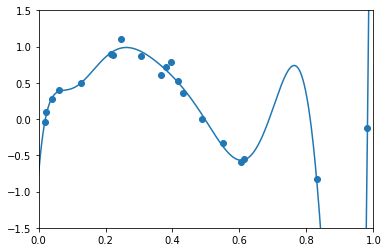

In [24]:
# Prueba 2 (Grado de polinomio alto, no utilizo término de penalización)

md = matrizDeDiseño(D_x, 10)
w = wOptimos(md, D_t, 0)

print("Error de entrenamiento")
print(E(D_x, D_t, w, 0))
print("")
print("Error de test")
print(E(D_x_test, D_t_test, w, 0))
#print(md)

plt.scatter(D_x,D_t)

x = np.arange(0.0, 5.0, 0.0002)

plt.plot(x, y(x,w))

plt.xlim(0.0, 1.0)
plt.ylim(-1.5, 1.5)

Error de entrenamiento
0.1002376985161786

Error de test
0.1412946755608741


(-1.5, 1.5)

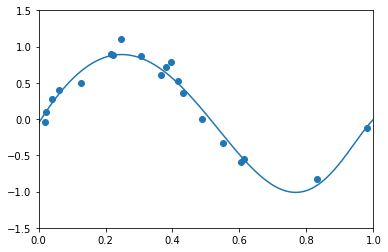

In [21]:
# Prueba 3 (Grado de polinomio alto, utilizo término de penalización)

md = matrizDeDiseño(D_x, 10)
w = wOptimos(md, D_t, 0.0005)

print("Error de entrenamiento")
print(E(D_x, D_t, w, 0))
print("")
print("Error de test")
print(E(D_x_test, D_t_test, w, 0))
#print(md)

plt.scatter(D_x,D_t)

x = np.arange(0.0, 5.0, 0.0002)

plt.plot(x, y(x,w))

plt.xlim(0.0, 1.0)
plt.ylim(-1.5, 1.5)

**Concluciones**

Se puede notar lo importante que es el grado a la hora de decidir los hiperpárametros del modelo. Un grado muy alto resulta en overfitting, y si bien no es insalvable (Usando término de regularización puede solucionarse), creo que es preferible tenerlo en cuenta y hacer una decisón consciente.

# Ejercicio 3
Determinar la mejor combinación de valores para los hiperparámetros λ
y M mediante validación cruzada (cross-validation). Considerar 3 valores para λ y 3 valores para M.

In [26]:
# Defino la función errorPromedio, que voy a usar en mejorCombinación
def errorPromedio(ds, w, i):
  resultadoAux = 0
  for j in range (len(ds)):
    if (j != i):
      resultadoAux = resultadoAux + E(ds[j][0], ds[j][1], w, 0)
  resultado = resultadoAux/(len(ds)-1)
  return resultado

# Creo una funcion a la cual le entran vector de vectores de la forma [[error, M , lambda],...,[error, M , lambda]] y se quedá con el de menor error
def menorError(errores):
  mejorError = errores[0][0]
  mejorM = errores[0][1]
  mejorLambda = errores[0][2]
  for x in errores:
    if (mejorError > x[0]):
      mejorError = x[0]
      mejorM = x[1]
      mejorLambda = x[2]
  combMenorError = [mejorM, mejorLambda]
  return combMenorError

def mejorCombinacion (ds, M, lam):
  i = 0
  errores = []
  for m in M:
    for l in lam:
      # Entreno con el data set i
      md = np.array(matrizDeDiseño(ds[i][0], m))
      w = wOptimos (md, np.array(ds[i][1]), l)

      # Valido con todos los data sets j, donde j != i, y promedio
      error = errorPromedio(ds, w, i)
      tupla = [error, m, l]
      errores.append(tupla)
      i = i+1
  mejorComb = menorError(errores)
  return mejorComb # Devuelve un vector con la mejor conmbinación de M y lambda, en ése orden.

## Pruebas

In [29]:
lam = [0.001,0,0.1]
M = [10]

mejor = mejorCombinacion(ds_general, M, lam)
print(f"La mejor combinación de los hiperparámetros intoducidos es: {mejor}")

La mejor combinación de los hiperparámetros intoducidos es: [10, 0.001]


In [30]:
lam = [0.001,0,0.1,0.005]
M = [10,6,2,1,8]

mejor = mejorCombinacion(ds_general, M, lam)
print(f"La mejor combinación de los hiperparámetros intoducidos es: {mejor}")

La mejor combinación de los hiperparámetros intoducidos es: [6, 0]
